# PySB Tutorial
Mostly copied from [https://pysb.readthedocs.io/en/stable/tutorial.html](https://pysb.readthedocs.io/en/stable/tutorial.html)

### Most basic model
A simple model of synthesizing a molecule (aka, `Monomer`).

#### Import packages

In [1]:
from pysb import *
from pysb.integrate import Solver


#### Build the model and simulate  
* Instantiate a `Model()`  
* Define a `Monomer` as `A`  
* Define a rate parameter `k` with a value of `3.`  
* Define the times (`t`) to evaluate the solutions  
* Usethe basic `Solver` to obtain the solutions  
* Print the output of the solutions  

In [2]:
Model()
Monomer('A')
Parameter('k', 3.0)
Rule('synthesize_A', None >> A(), k)
t = [0, 10, 20, 30, 40, 50, 60]
solver = Solver(model, t)
solver.run()
print(solver.y[:, 0])

[  0.  30.  60.  90. 120. 150. 180.]


### You can also load a model from a file
The same model that is hard-coded above has been put into a separate file (`tutorial_a.py`). We will import the model within it and simulate with an ODE simulator.

In [3]:
from __future__ import print_function
from pysb.simulator import ScipyOdeSimulator
from tutorial_a import model

t = [0, 10, 20, 30, 40, 50, 60]
simulator = ScipyOdeSimulator(model, tspan=t)
simresult = simulator.run()
print(simresult.species)

[[  0.]
 [ 30.]
 [ 60.]
 [ 90.]
 [120.]
 [150.]
 [180.]]


### Load a new model and simulate it
Another model is defined in [`mymodel.py`](./mymodel.py). It is a model of the cleavage reaction of Bid by caspase 8.  

We will import the model (saving as object `m`), simulate the output, and plot the observables.

In [4]:
import mymodel as m

In [5]:
from pysb.simulator import ScipyOdeSimulator
import pylab as pl

In [6]:
t = pl.linspace(0, 20000)

In [7]:
m.model.observables

ComponentSet([
 Observable('obsC8', C8(b=None)),
 Observable('obsBid', Bid(b=None, S='u')),
 Observable('obstBid', Bid(b=None, S='t')),
 ])

In [8]:
simres = ScipyOdeSimulator(m.model, tspan=t).run()
yout = simres.all

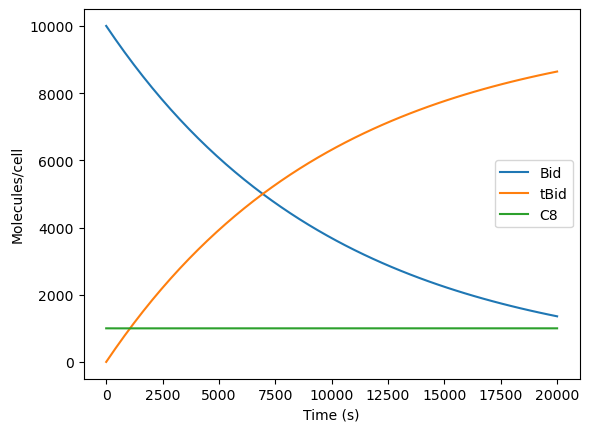

In [9]:
pl.ion()
pl.figure()
pl.plot(t, yout['obsBid'], label="Bid")
pl.plot(t, yout['obstBid'], label="tBid")
pl.plot(t, yout['obsC8'], label="C8")
pl.legend()
pl.xlabel("Time (s)")
pl.ylabel("Molecules/cell")
pl.show()